<a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

# Classification_성능평가지표

## 한눈에 먼저 보고 갈께요~

||`True Positive`|`False Positive`|`True Negative`|`False Negative`|
|:--:|:--:|:--:|:--:|:--:|
|예측값|`Positive`, 1|`Positive`, 1|`Negative`, 0|`Negative`, 0|
|실재값|`Positive`|`Negative`|`Positive`|`Negative`|
|예측값과 실재값|일치|불일치|일치|불일치|

<a> <div> <img align='cneter' src='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/a8c4f31d50cd44e8bb6be48ec445798f/49c6af87-06e8-4170-a309-af35e659020d.png' width='500' /> </div></a>


|지표|공식|의미|
|:-|:-|:-|
|정확도|`(TN + TP) / (TN + FP + FN + TP)`|예측 값이 일치하는 비율|
|오류율|`(FN + FP) / (TN + FP + FN + TP)`|예측 값이 불일치하는 비율|
|정밀도(Precision)|`TP / (FP + TP)`|예측 값 `Positive, 1` 중 `Positive` 인 비율|
|재현율(Recall)|`TP / (FN + TP)`|실재 값 `Positive` 중에 `Positive, 1`으로 예측한 비율|
|민감도(Sensitivity)|`TP / (TP + FN)`|실재 값 `Positive` 중에 `Positive, 1`으로 예측한 비율|
|특이도(specificity)|`TN / (TN + FP)`|실재 값 `Negative` 중에 `Negative, 0`으로 예측한 비율|

\begin{equation}
F1 = 2 \times \frac{정밀도 \times 재현율}{정밀도 + 재현율}
\end{equation}


##  classification_report
* Precision, Recall, F1-score 를 한눈에

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))


학습 데이터 점수: 0.9385714285714286
평가 데이터 점수: 0.9033333333333333


In [15]:
from sklearn.metrics import classification_report
model_report = classification_report(y_pred=predict, y_true= y_test)

print(model_report)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       147
           1       0.88      0.93      0.91       153

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [16]:
model_report_dict = classification_report(y_pred=predict, y_true=y_test, output_dict=True)
model_report_dict

{'0': {'precision': 0.927536231884058,
  'recall': 0.8707482993197279,
  'f1-score': 0.8982456140350877,
  'support': 147},
 '1': {'precision': 0.8827160493827161,
  'recall': 0.934640522875817,
  'f1-score': 0.9079365079365078,
  'support': 153},
 'accuracy': 0.9033333333333333,
 'macro avg': {'precision': 0.905126140633387,
  'recall': 0.9026944110977724,
  'f1-score': 0.9030910609857978,
  'support': 300},
 'weighted avg': {'precision': 0.9046779388083737,
  'recall': 0.9033333333333333,
  'f1-score': 0.9031879699248119,
  'support': 300}}

## 오차 행렬(Confusion Matrix)

||`True`|`False`|
|--|----|----|
|예측값과 실재값|일치|불일치|

||`Positive`|`Negative`|
|-|-|-|
|예측값|`Positive`, 1|`Negative`, 0|

||`True Positive`|`False Positive`|`True Negative`|`False Negative`|
|:--:|:--:|:--:|:--:|:--:|
|예측값|`Positive`, 1|`Positive`, 1|`Negative`, 0|`Negative`, 0|
|실재값|`Positive`|`Negative`|`Positive`|`Negative`|
|예측값과 실재값|일치|불일치|일치|불일치|

* True Negative: 예측값을 Negative 값 0으로 예측했고, 실제 값도 Negative 값 0
    
    
    
* False Positive: 예측값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0



* False Negative: 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1



* True Positive: 예측값을 Positive 값 1로 예측했고, 실제 값도 Positive 값 1



In [11]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=predict)

print(conf_mat)

[[147   3]
 [  1 149]]


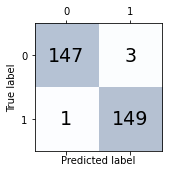

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center', fontsize=19 )
        
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

<div> <img align='left' src='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/a8c4f31d50cd44e8bb6be48ec445798f/49c6af87-06e8-4170-a309-af35e659020d.png' width='500' /> </div>

## 정확도(Accuracy)

* 정확도는 전체 예측 데이터 건수 중 예측 결과가 동일한 데이터 건수로 계산
* scikit-learn에서는 `accuracy_score` 함수를 제공


* 정확도 = (TN + TP) / (TN + FP + FN + TP)
* 오류율 = (FN + FP) / (TN + FP + FN + TP)

In [13]:
from sklearn.metrics import accuracy_score

print("정확도:{}".format(accuracy_score(y_test, predict)))

정확도:0.9866666666666667


## 정밀도(Precision)와 재현율(Recall)



* 정밀도(Precision) 
     - = TP / (FP + TP) :  예측 값 `Positive, 1` 중 `Positive` 인 비율   
     
     
     

* 재현율(Recall)  , 민감도(Sensitivity), TPR(True Positive Rate)
    - = TP / (FN + TP) : 실재 값 `Positive` 중에 `Positive, 1`으로 예측한 비율

In [14]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)

print("정밀도: {}".format(precision))
print("재현율: {}".format(recall))

정밀도: 0.9802631578947368
재현율: 0.9933333333333333


##  민감도(sensitivity) 와  특이도(specificity) 

* 민감도(Sensitivity), 재현율(Recall), TPR(True Positive Rate)
    - = TP / (TP + FN) : 실재 값 `Positive` 중에 `Positive, 1`으로 예측한 비율    
    
    

* 특이도(specificity), TNR(True Negative Rate)
    - = TN / (TN + FP) : 실재 값 `Negative` 중에 `Negative, 0`으로 예측한 비율

## F1 Score(F-measure)

* 정밀도와 재현율을 결합한 지표 ( 정밀도와 재현율의 조화평균)
* 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 높은 값을 가짐

\begin{equation}
F1 = 2 \times \frac{정밀도 \times 재현율}{정밀도 + 재현율}
\end{equation}

\begin{equation}
F1 = 2 \times \frac{precision \times recall}{precision + recall}
\end{equation}


In [15]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predict)
print("F1 Score: {}".format(f1))

F1 Score: 0.9867549668874172


## ROC Curve and AUC 

* ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
  + TPR(True Positive Rate): TP / (FN + TP), 재현율
  + TNR(True Negative Rate): TN / (FP + TN)
  + FPR(False Positive Rate): FP / (FP + TN), 1 - TNR

* AUC(Area Under Curve) 값은 ROC 곡선 밑에 면적을 구한 값 (1이 가까울수록 좋은 값)

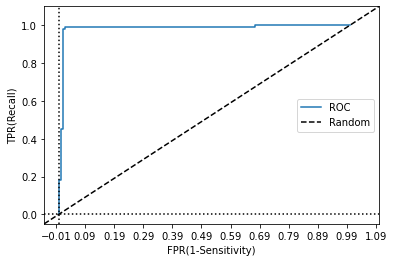

In [30]:
from sklearn.metrics import roc_curve
import numpy as np

pred_proba_class1 = model.predict_proba(X_test)[:, 1] # 클래스가 1인것에 대한 확률
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

plt.plot(fprs, tprs, label='ROC')

plt.plot([-0.05, 1.1], [-0.05, 1.1], '--k', label='Random')
start,end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(-0.05, 1.1)
plt.ylim(-0.05, 1.1)
plt.xlabel('FPR(1-Sensitivity)')
plt.ylabel('TPR(Recall)')
plt.axvline(x=0, color = 'k', ls=':')  # draw x =0 axes
plt.axhline(y=0, color = 'k', ls=':')   # draw y =0 axes
plt.legend();

## KAPPA 통계량

# Regression_성능평가지표

# Clustering_성능평가지표

# 출처:

* <a href='https://github.com/SeWonKwon' ><div> <img src ='https://slid-capture.s3.ap-northeast-2.amazonaws.com/public/image_upload/6556674324ed41a289a354258718280d/964e5a8b-75ad-41fc-ae75-0ca66d06fbc7.png' align='left' /> </div></a>

<br>



* [이수안컴퓨터연구소](https://www.youtube.com/c/%EC%9D%B4%EC%88%98%EC%95%88%EC%BB%B4%ED%93%A8%ED%84%B0%EC%97%B0%EA%B5%AC%EC%86%8C)

* [파이썬 머신러닝 완변가이드, 권철민](https://book.naver.com/bookdb/book_detail.nhn?bid=16238302)

* 빅데이터분석기사 필기, DataEDU

* [R Friend](https://rfriend.tistory.com/636)

* [sklearn](https://scikit-learn.org/)